$$
x(n+1) = e^h x(n) + (e^h - 1)u(n - N)
$$

$$
u(n) = -(1 + \lambda_d)\left[ e x(n) + h\sum_{k=1}^N e^{kh} u(n-k) \right]
$$

In [113]:
%matplotlib inline
from matplotlib.pyplot import plot, style, figure
style.use("ggplot")
from numpy import arange

In [119]:
psi = lambda ts: [0 if t<0.001 else 1 for t in ts]
psi0 = lambda ts: [1 for t in ts]

In [61]:
psi([-2, -1, 0, 0.001, 1, 2])

[0, 0, 0, 1, 1, 1]

In [152]:
def control_law(x, u, λd, h):
    from numpy import exp
    
    N = len(u)
    
    arreglo = []
    for k in range(1, N + 1):
        arreglo.append(exp(k*h)*u[-k])
        
    sumatoria = sum(arreglo)
    return -(1 + λd)*(exp(1)*x + h*sumatoria)

In [156]:
control_law(0, [1, 1, 1], 1, 0.1)

-0.73528649676236413

In [164]:
def sistema(x0, ψ, t0, tf):
    from numpy import exp, arange
    
    h = 1
    λ = 1
    N = 10
    δ = h/N
    T = tf - t0
    ts = T/h
        
    us = ψ(arange(-h, 0, δ))
    xs = [x0]
    
    for n in range(1, int(ts*N) + 1):
        u = us[-N:-1] + [us[-1]]
        ν = control_law(xs[-1], u, λ, δ)
        xs.append(exp(δ)*xs[-1] + (exp(δ) - 1)*ν)
        us.append(ν)
        
    return xs, us

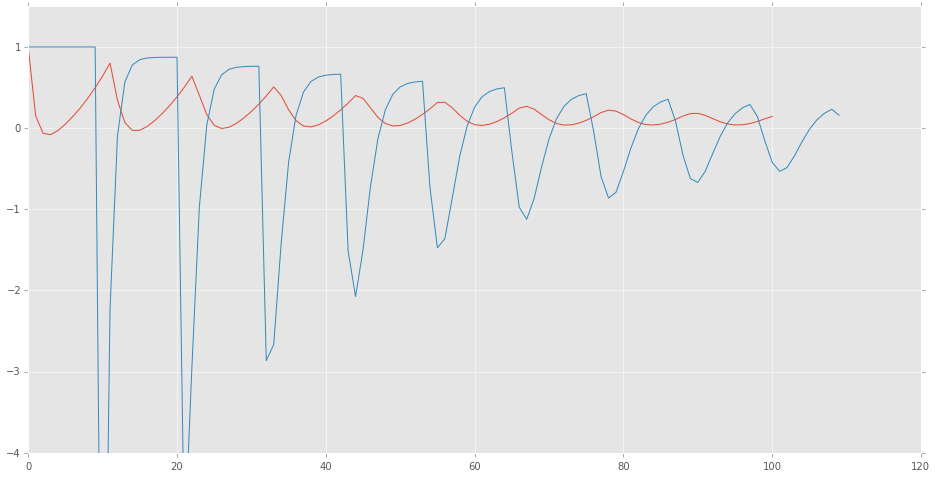

In [191]:
xs, us = sistema(x0=1, ψ=psi0, t0=0, tf=10)

fig = figure(figsize=(16,8))
plot(xs)
plot(us)
ax = fig.gca()
ax.set_ylim(-4, 1.5);

In [179]:
ts = arange(0, 10 + 0.1, 0.1)
len(ts)

101

In [48]:
for i in range(-10, 0):
    print(i)

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1


In [66]:
from numpy import arange

In [151]:
h = 1
N = 10
δ = h/N
δ

0.1

In [161]:
psi0(arange(-h, 0, δ))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [52]:
-h*(h/N)

-0.1

In [88]:
pizza = [-1, 2, 3, 4, 5, -8, 10, 4, 5, 2, -1, -5, 6, 8]

In [91]:
pizza[-N:-1] + [pizza[-1]]

[5, -8, 10, 4, 5, 2, -1, -5, 6, 8]

In [109]:
arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])